In [1]:
from _globals import *

# NK Covid 19 Model

![](https://user-images.githubusercontent.com/63464503/128604273-25feab06-10f2-4b20-a26f-529b298d2e5b.png)

## Constructing the entities

In [6]:
# assuming -> first wave
S0 = 1; S = pk.Entity(S0, name = "Susceptible") # the entire Poruguese population
E0 = 0;    E = pk.Entity(E0, name = "Exposed") 
A0 = 0;    A = pk.Entity(A0, name = "Asymptomatic")
I0 = 0;    I = pk.Entity(I0, name = "Symptomatic")
H0 = 0;    H = pk.Entity(H0, name = "Hospitalized")
R0 = 0;    R = pk.Entity(R0, name = "Removed")

### Connecting them

In [17]:

def make_model(
    beta_1 = 1,
    beta_2 = 1,
    beta_3 = 1,
    N = 1,
    lamb = 0.5,
    sigma = 1,
    K1 = 1,
    k2 = 1,
    ):

    S0 = 1;    S = pk.Entity(S0, name = "Susceptible") # the entire Poruguese population
    E0 = .001; E = pk.Entity(E0, name = "Exposed") 
    A0 = 0;    A = pk.Entity(A0, name = "Asymptomatic")
    I0 = 0;    I = pk.Entity(I0, name = "Symptomatic")
    H0 = 0;    H = pk.Entity(H0, name = "Hospitalized")
    R0 = 0;    R = pk.Entity(R0, name = "Removed")

    S.connect(
        E, 
        lambda : (beta_1*A.Y() + beta_2*I.Y() + beta_3*H.Y())/N
        )



    E.connect(A, (1-lamb)*sigma)

    A.connect(R, K1)

    E.connect(I, lamb*sigma)
    I.connect(H, lamb)

    H.connect(R, k2)

    model = pk.Model(S, E, A, I, H, R, name = "SK SIR model")
    print(model)
    return model


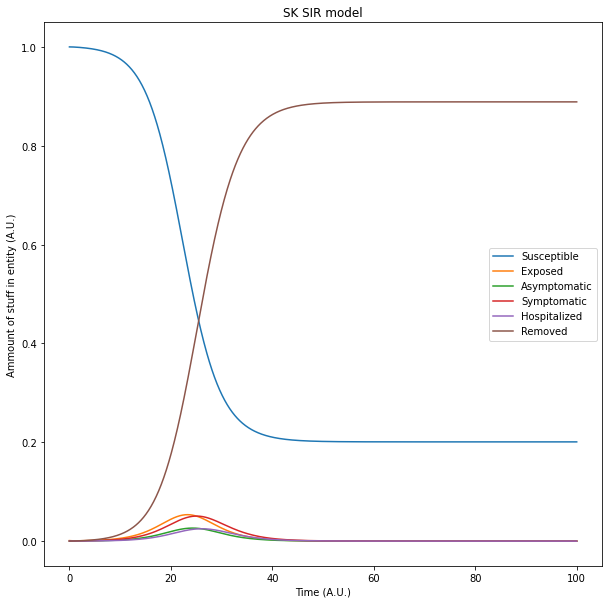

In [22]:
model = make_model()
model.run(time = 100)
model.plot()
